## Counting experiment example

* Assume an experiment where you select events with some specific properties.
* You observe **6** events
* And you have a predicted background of **2.3** events

Is this a `significant` signal?


### p-Values
We can do hypothesis testing:
* $H_0$ (=null Hypothesis) data results from background only
* $H_1$ (=altenative Hypothesis) there is additional non-zero signal

`p-value` : defined as probability under $H_0$ to observe at least as many events as observed. If `p-value` is `sufficiently small` reject  $H_0$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
stats.poisson?

### simple case without uncertainties
Can directly use poisson from scipy.stats and calculate probability:

<BarContainer object of 10 artists>

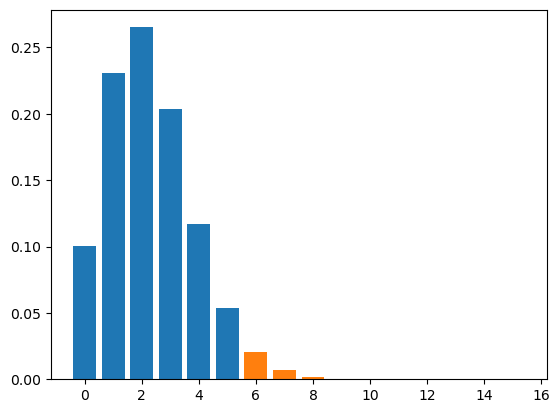

In [2]:
mu = 2.3
obs=6
x = np.linspace(0,15,16)
px = stats.poisson.pmf(x,mu)
#plt.bar(x,px)
plt.bar(x[:obs],px[:obs]) # lt obs
plt.bar(x[obs:],px[obs:]) # ge obs


In [3]:
# simply add probabilities for x>=6
px[x>=obs].sum()

0.029975690303472413

In [4]:
# or use 1-cdf
1-stats.poisson.cdf(obs-1,2.3)

0.029975693697454786

#### Alternative : use random numbers = Toy MC
Generate sample of Poisson distributed random numbers for estimate

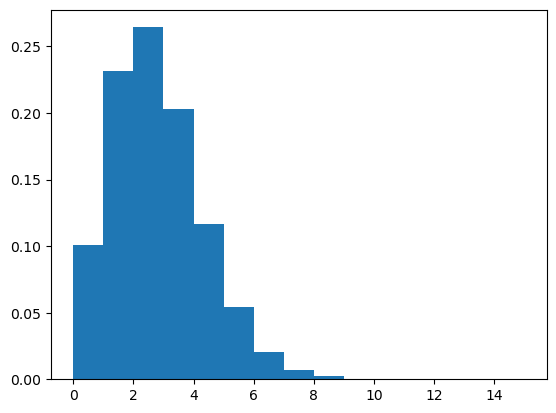

In [5]:
# generate poisson distributed rns
b=stats.poisson.rvs(mu,size=100000) # scipy.stats version
plt.hist(b,bins=15,range=(0,15),density=True);


In [6]:
print(f"Fraction >= {obs} : {np.sum(b>=obs)/b.shape[0]}")

Fraction >= 6 : 0.03005


In [7]:
# repeat several times
bs = [stats.poisson.rvs(mu,size=10000) for i in range(10)]
bm = np.array([np.sum(x>=obs)/x.shape[0] for x in bs])
print(f"Fraction >= {obs} : {bm.mean():.4f} =- {bm.std():.4f}")
              

Fraction >= 6 : 0.0297 =- 0.0013


### Background uncertainties
In reality we need to consider uncertainties for background

$\rightarrow$ Toy MC

* Let's assume we have XX% uncertainty on background prediction which is Gaussian distributed
* Then we generate corresponding Gaussian distributed background-number and use that for sub-sequent Poisson random number

In [8]:
def bgpoisson( bg, dbg, n ):
    bgs = np.random.normal( bg, dbg, n)
    bgs = bgs[bgs>1e-6]
    bres = np.array([ int(np.random.poisson(b,1)) for b in bgs ])
    return bres

In [9]:
%timeit bgpoisson( mu, mu*0.3, 10000)

21.5 ms ± 61.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
br = bgpoisson( mu, mu*0.3, 1000000)
print(f"Fraction >= {obs} : {np.sum(br>=obs)/br.shape[0]}")

Fraction >= 6 : 0.04377626155508424


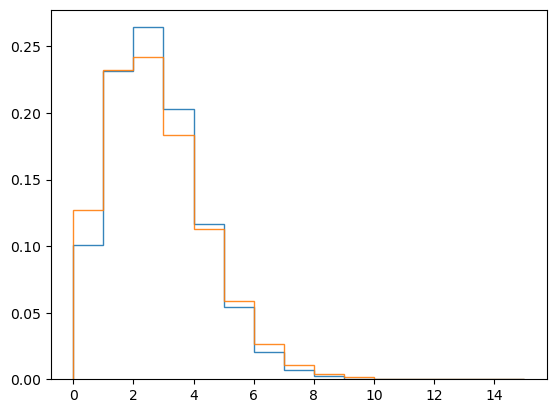

In [11]:
kwargs = dict(histtype='step', alpha=0.9, density=True)
plt.hist(b,bins=15,range=(0,15),**kwargs);
plt.hist(br,bins=15,range=(0,15),**kwargs);


<div class="alert alert-block alert-info">
<b>Task 1</b><br>
    
Repeat above Poisson-counting with uncertainties for these Numbers:
    $$ n_{obs} = 8, n_{bg} = 5.2$$
    
Determine the `p-value` for 0%, 15% and 25% uncertainty on $ n_{bg} $

</div>